<a href="https://colab.research.google.com/github/prateeknigam9/Meme-classifier/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Case_study2/data'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Case_study2/data


In [ ]:
!ls

data.csv  db.json  memes  navalues.txt


In [ ]:
!pip install easyocr

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from pandas.io.json import json_normalize
from PIL import Image
import os
from tqdm import tqdm
import cv2
import easyocr
from IPython.display import Image as displayImage
import re
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### Data Prepearation

In [ ]:
with open("db.json",'r') as f:
    d = json.load(f)
d = d['_default']

In [ ]:
temp=DataFrame([])
data=DataFrame([])
for i in d:
    temp = json_normalize(d[i])
    data = data.append(temp)

In [ ]:
data.index=range(len(d))
print(data.shape)
data.head()

(3226, 10)


,title,created_utc,author,id,ups,downs,media,thumbnail.thumbnail,thumbnail.height,thumbnail.width
0,Num🅱er One,1.502621e+09,DrarenThiralas,6tehbc,87082,0,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140
1,Got ‘em,1.523557e+09,CasualDad8675309,8bse8k,75251,0,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140
2,50-0,1.503862e+09,NikiTosThePleb,6we7gp,64236,0,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140
3,Allow,1.515929e+09,bananahands0666,7qbcqw,63386,0,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140
4,*mild concern*,1.516919e+09,DJ_MilkBags,7szw80,61458,0,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140


### Data Analysis

In [ ]:
# Converting the time into DateTime format
j=0
date_time = Series(range(len(data['created_utc'])))
for i in data['created_utc']:
    date_time[j]= datetime.datetime.fromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S')
    j=j+1
data['date_created'] = date_time
data = data.drop('created_utc',axis=1)
data.head(3)

,title,author,id,ups,downs,media,thumbnail.thumbnail,thumbnail.height,thumbnail.width,date_created
0,Num🅱er One,DrarenThiralas,6tehbc,87082,0,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13 10:45:09
1,Got ‘em,CasualDad8675309,8bse8k,75251,0,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12 18:21:27
2,50-0,NikiTosThePleb,6we7gp,64236,0,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27 19:30:27


#### Categorical Features

##### Title Feature

In [ ]:
data['title'].value_counts()[:10]

.                          20
True                        7
Oof                         5
Meirl                       5
Who would win?              4
Savage                      4
Lol                         4
Press F to pay respects     3
Normie                      3
Dank?                       3
Name: title, dtype: int64

Thus observed:

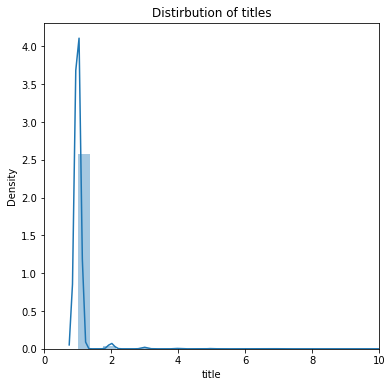

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['title'].value_counts(),hist=True)
plt.title("Distirbution of titles")
plt.xlim(0,10)
plt.show()

##### Author Feature

In [ ]:
data['author'].nunique()

2197

There are 2197 different authors, if we see the percentage and distribution of their work.

[]

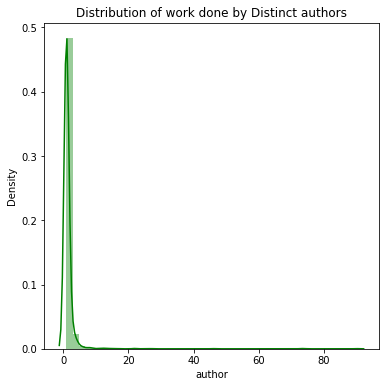

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['author'].value_counts(),color='green')
plt.title("Distribution of work done by Distinct authors")
plt.plot()

we can observe that although there are 2197 distinct authors, but the probability of meme producers with higher count , authors are below 10-15 

Text(0.5, 1.0, 'percentage share of top 10 max count authors')

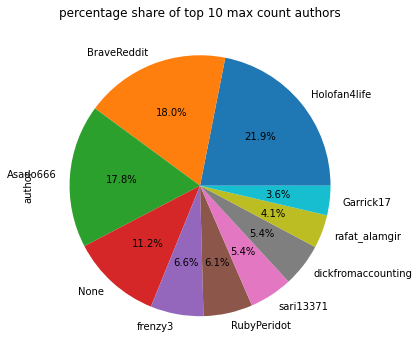

In [ ]:
plt.figure(figsize=(6,6))
data['author'].value_counts()[:10].plot.pie(autopct="%.1f%%")
plt.title("percentage share of top 10 max count authors")

Thus observed that most posts are from "Holofan4life" followed by "BraveReddit" and "Asado666" and so on.

##### UPs Feature

In [ ]:
data['ups']

0       87082
1       75251
2       64236
3       63386
4       61458
        ...  
3221      499
3222      496
3223      497
3224      494
3225      502
Name: ups, Length: 3226, dtype: int64

Mean 23802.590204587726
Median 14757.0
Min 494
max 293544


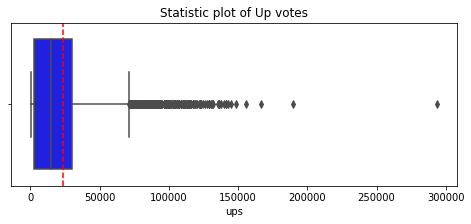

In [ ]:
plt.figure(figsize=(8,3))
print("Mean",data['ups'].mean())
print("Median",data['ups'].median())
print("Min",data['ups'].min())
print("max",data['ups'].max())
sns.boxplot(data['ups'],color='blue')
plt.title("Statistic plot of Up votes")
plt.axvline(data['ups'].mean(),ls='--',color='red')
plt.show()

With the upvotes we can define the target variable, as whichever is more than median of ups will be dank while the other one will be not

In [ ]:
dankornot=[]
med = data['ups'].median()
for i in range(len(data)):
    if data['ups'][i] > med:
        dankornot.append(1)
    else:
        dankornot.append(0)
data['Dank_or_not'] = dankornot

In [ ]:
# plt.plot(dict(data['Dank_or_not'].value_counts()))

Based on the observation we figured out that each id signifies to the jpg image of that meme.

In [ ]:
for i in tqdm(list(os.listdir('memes/memes/'))):
  file_name = i.split('.')[0]
  if os.path.exists('memes/'+str(file_name)+'.jpg'):
      pass
  else:
      im = Image.open('memes/memes/'+str(i))
      rgb_im = im.convert('RGB')
      if '.png' in i:
        rgb_im.save('memes/'+str(file_name)+'.jpg')
      else:
        rgb_im.save('memes/'+str(file_name)+'.jpg')

100%|██████████| 3378/3378 [00:00<00:00, 10097.29it/s]


In [ ]:
file_list=[]
for id in data['id']:
    file_list.append('memes/'+str(id)+'.jpg')
data['meme_path'] = file_list
data = data.drop(['media','thumbnail.thumbnail'],axis=1)
data.head(3)

,title,author,id,ups,downs,thumbnail.height,thumbnail.width,date_created,Dank_or_not,meme_path
0,Num🅱er One,DrarenThiralas,6tehbc,87082,0,121,140,2017-08-13 10:45:09,1,memes/6tehbc.jpg
1,Got ‘em,CasualDad8675309,8bse8k,75251,0,98,140,2018-04-12 18:21:27,1,memes/8bse8k.jpg
2,50-0,NikiTosThePleb,6we7gp,64236,0,140,140,2017-08-27 19:30:27,1,memes/6we7gp.jpg


Additional features such as urls to access the post on Reddit and downvotes, meme awards,downs and posting author were eliminated early on because they were incomplete, populated mostly with zeros, including thumbnail properties

Many of the features scraped from Reddit metadata were
already numerical, such as created utc and ups


We can process the meme images, titles, and text from the images to enrich our feature set with more content-based features.

### Data Preperation

Explanatory analysis can be done on  the textual and image related attributes with a focus on the impact they have on meme popularity, and can apply feature engineering onto these features

#### Text analysis

A large portion of the humor and meaning of memes are contained in the text which appears inside a meme image, so we can extract those words and apply observation on them, and analyse the predictibily of being dank or not based on the context.

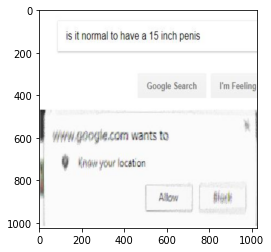

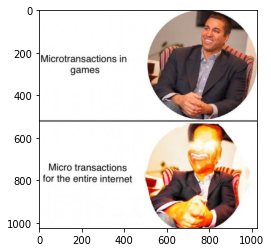

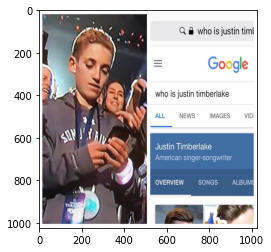

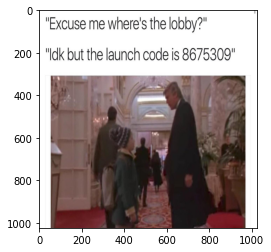

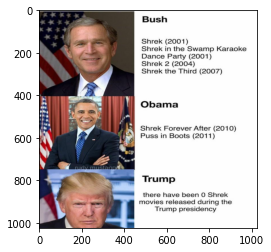

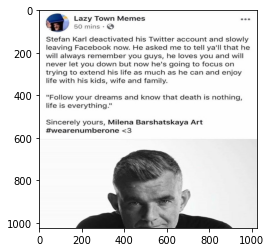

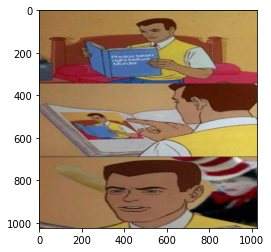

In [ ]:
for i in [3,6,7,8,12,34,56]:
    im = cv2.imread(data['meme_path'][i])
    im_resized = cv2.resize(im, (1024, 1024), interpolation=cv2.INTER_LINEAR)

    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
data['sentences'] = np.zeros(len(data))

In [ ]:
output = reader.readtext(data['meme_path'][2])
output

[([[265, 331], [401, 331], [401, 371], [265, 371]],
  'How to',
  0.9646041561692933),
 ([[265, 377], [373, 377], [373, 419], [265, 419]],
  'make',
  0.9999891519546509),
 ([[265, 425], [413, 425], [413, 467], [265, 467]],
  'millions',
  0.9999776199197071),
 ([[546, 1434], [644, 1434], [644, 1466], [546, 1466]],
  'Damn',
  0.9995095133781433),
 ([[666, 1429], [744, 1429], [744, 1469], [666, 1469]],
  'wish',
  0.9997091779662574),
 ([[545, 1475], [559, 1475], [559, 1497], [545, 1497]],
  'L',
  0.03514503590796303),
 ([[563, 1467], [739, 1467], [739, 1503], [563, 1503]],
  'could read',
  0.8262275367278833),
 ([[129.2530422886731, 842.2759126866019],
   [228.90022244513597, 799.4405850289256],
   [249.7469577113269, 848.7240873133981],
   [150.09977755486403, 891.5594149710744]],
  'Fight',
  0.5742874342539643),
 ([[152.77165594187537, 889.4291398546884],
   [270.96972982252106, 827.5009728678094],
   [290.2283440581246, 875.5708601453116],
   [173.0302701774789, 938.499027132190

3it [00:00,  2.83it/s]

memes/7qbcqw.jpg


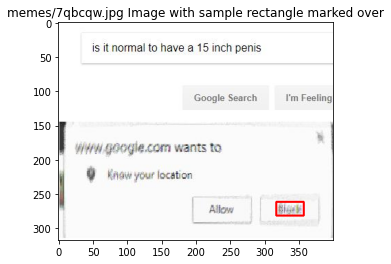

6it [00:01,  4.05it/s]

memes/7ep89z.jpg


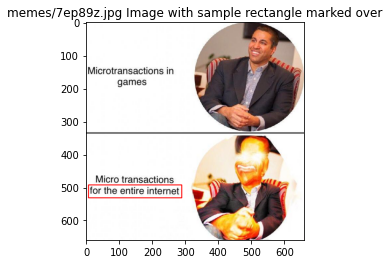

7it [00:01,  3.78it/s]

memes/7vbgih.jpg


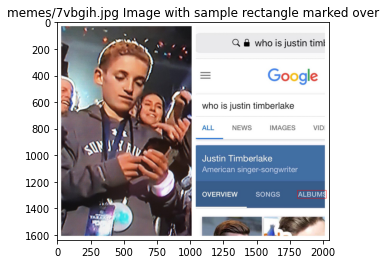

8it [00:03,  1.88it/s]

memes/6c13dg.jpg


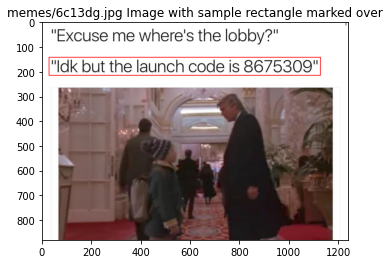

12it [00:04,  3.10it/s]

memes/7suu6t.jpg


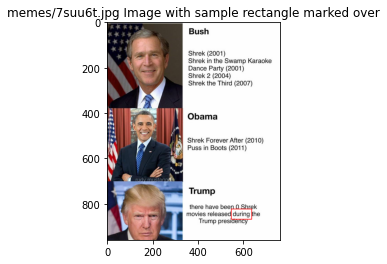

34it [00:09,  4.75it/s]

memes/89e9j0.jpg


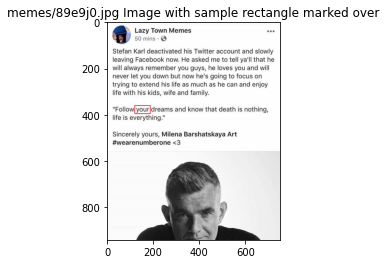

56it [00:13,  5.50it/s]

memes/74zxfk.jpg


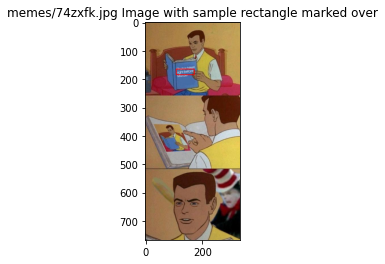

3226it [36:05,  1.49it/s]


In [ ]:
non_updated=[]
for i,img_path in tqdm(enumerate(data['meme_path'])):
    sentence=[]
    if data['sentences'][i]== 0:
        try:
            output = reader.readtext(img_path)
            if i in [3,6,7,8,12,34,56]:
                print(data['meme_path'][i])
                cord = output[-1][0]
                x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
                x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
                image = cv2.imread(data['meme_path'][i])
                cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title(f"{data['meme_path'][i]} Image with sample rectangle marked over")
                plt.show()
            for desc in output:
                sentence.append(desc[1])
            sent = ' '.join(sentence)
            data['sentences'][i] = sent
        except:
            non_updated.append(img_path)
            data['sentences'][i] = np.nan
    else:
      pass

In [ ]:
data.head()

,title,author,id,ups,downs,thumbnail.height,thumbnail.width,date_created,Dank_or_not,meme_path,sentences
0,Num🅱er One,DrarenThiralas,6tehbc,87082,0,121,140,2017-08-13 10:45:09,1,memes/6tehbc.jpg,"rleurope 1h ruvis u/batteries-included ""Life I..."
1,Got ‘em,CasualDad8675309,8bse8k,75251,0,98,140,2018-04-12 18:21:27,1,memes/8bse8k.jpg,When Reddit is making fun of Mark Zuckerberg f...
2,50-0,NikiTosThePleb,6we7gp,64236,0,140,140,2017-08-27 19:30:27,1,memes/6we7gp.jpg,How to make millions Damn wish L could read Fi...
3,Allow,bananahands0666,7qbcqw,63386,0,110,140,2018-01-14 11:18:09,1,memes/7qbcqw.jpg,is it norma to have a 15 inch penis Google Sea...
4,*mild concern*,DJ_MilkBags,7szw80,61458,0,134,140,2018-01-25 22:19:11,1,memes/7szw80.jpg,when re an npc and you see the player quicksav...


In [ ]:
# clean_text
def clean_text(line):
    line = re.sub('<[^>]*>',' ',line).strip()
    line = line.strip().replace('\n','')
    line = re.sub('[^A-Za-z0-9]+',' ',line).strip()
    line = re.sub("([\(\[]).*?([\)\]])", "", line)
    line = re.sub('\W+', " ", line)
    line = re.sub("[0-9]",' ',line)
    return line.lower().strip()

data['clean_sent'] = np.zeros(len(data))
for i,sent in enumerate(data['sentences'].values):
  try:
    data['clean_sent'][i] = clean_text(sent)
  except:
      data['clean_sent'][i] = ""
data = data.drop('sentences',axis=1)
data['clean_sent']    

0       rleurope  h ruvis u batteries included life is...
1       when reddit is making fun of mark zuckerberg f...
2       how to make millions damn wish l could read fi...
3       is it norma to have a    inch penis google sea...
4       when re an npc and you see the player quicksav...
                              ...                        
3221    ii can copy your homework ii just change it up...
3222    farmersonlycok eiy oles dou t get sarcastic sodle
3223    thank god im an atheist r robertk       month ago
3224    watcl yov rc that the sky is te wrong wr ow co...
3225                                black monopoly chance
Name: clean_sent, Length: 3226, dtype: object

In [ ]:
porter = PorterStemmer()
portered=[]
for sent in data['clean_sent']:
  portered.append(porter.stem(sent))
del data['clean_sent']
data['clean_sent'] = portered

#### Sentiment Column

Using the processed text data we can extract some potentially predictive attributes such as sentiment and word count. First, we calculated the sentiment scores that quantify the feeling or tone of the text. If the text is positive or happy, it scores closer to 1, and negative or sad texts score closer to 0.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
polarity=[]
for sentence in data['clean_sent'].values:
    try:
        v = list(sid.polarity_scores(sentence).values())
        k = list(sid.polarity_scores(sentence).keys())
        polarity.append(k[v.index(max(v))])
    except:
        polarity.append(np.nan)
data['sentiment'] = polarity

In [ ]:
data.to_csv('data.csv')
data.head()

,title,author,id,ups,downs,thumbnail.height,thumbnail.width,date_created,Dank_or_not,meme_path,clean_sent,sentiment
0,Num🅱er One,DrarenThiralas,6tehbc,87082,0,121,140,2017-08-13 10:45:09,1,memes/6tehbc.jpg,rleurope h ruvis u batteries included life is...,neu
1,Got ‘em,CasualDad8675309,8bse8k,75251,0,98,140,2018-04-12 18:21:27,1,memes/8bse8k.jpg,when reddit is making fun of mark zuckerberg f...,neu
2,50-0,NikiTosThePleb,6we7gp,64236,0,140,140,2017-08-27 19:30:27,1,memes/6we7gp.jpg,how to make millions damn wish l could read fi...,neu
3,Allow,bananahands0666,7qbcqw,63386,0,110,140,2018-01-14 11:18:09,1,memes/7qbcqw.jpg,is it norma to have a inch penis google sea...,neu
4,*mild concern*,DJ_MilkBags,7szw80,61458,0,134,140,2018-01-25 22:19:11,1,memes/7szw80.jpg,when re an npc and you see the player quicksav...,neu


In [ ]:
data['sentiment'].value_counts()

neu         2740
neg          266
compound     207
pos           13
Name: sentiment, dtype: int64

we can also observe that neutral memes perform better than extreme ones, but of the extremes, negative sentiments perform better than positive sentiments

In [ ]:
sntmnt=[]
for sentiment in data['sentiment'].values:
    if sentiment == 'neu':
        sntmnt.append(0)
    elif sentiment == 'neg':
        sntmnt.append(-1)
    elif sentiment == 'pos':
        sntmnt.append(1)
    elif sentiment == 'compound':
        sntmnt.append(0.5)
data['sentiment'] = sntmnt
data['sentiment'].value_counts()

 0.0    2740
-1.0     266
 0.5     207
 1.0      13
Name: sentiment, dtype: int64

In [ ]:
count=[]
for text in data['clean_sent'].values:
    count.append(len(text.split(' ')))
data['word_count'] = count

we can look into the publish time and predict of higher chance to attract great attention. This result could be helpful to mean that most upvotes on Reddit are
accumulated during what course of the day.

In [ ]:
data['date_created'] = data['date_created'].astype('datetime64[ns]')
data['year'] = data['date_created'].dt.year
data['month'] = data['date_created'].dt.month
data['year'] = data['date_created'].dt.year
data['day'] = data['date_created'].dt.day
data['hour'] = data['date_created'].dt.hour

In [ ]:
data.head()

,title,author,id,ups,downs,thumbnail.height,thumbnail.width,date_created,Dank_or_not,meme_path,clean_sent,sentiment,word_count,year,month,day,hour
0,Num🅱er One,DrarenThiralas,6tehbc,87082,0,121,140,2017-08-13 10:45:09,1,memes/6tehbc.jpg,rleurope h ruvis u batteries included life is...,0.0,22,2017,8,13,10
1,Got ‘em,CasualDad8675309,8bse8k,75251,0,98,140,2018-04-12 18:21:27,1,memes/8bse8k.jpg,when reddit is making fun of mark zuckerberg f...,0.0,14,2018,4,12,18
2,50-0,NikiTosThePleb,6we7gp,64236,0,140,140,2017-08-27 19:30:27,1,memes/6we7gp.jpg,how to make millions damn wish l could read fi...,0.0,14,2017,8,27,19
3,Allow,bananahands0666,7qbcqw,63386,0,110,140,2018-01-14 11:18:09,1,memes/7qbcqw.jpg,is it norma to have a inch penis google sea...,0.0,24,2018,1,14,11
4,*mild concern*,DJ_MilkBags,7szw80,61458,0,134,140,2018-01-25 22:19:11,1,memes/7szw80.jpg,when re an npc and you see the player quicksav...,0.0,15,2018,1,25,22


In [ ]:
# data.to_csv('data.csv',index=False)
# data.head(3)

In [ ]:
numerical_features = ['thumbnail.height','thumbnail.width','sentiment','word_count','Dank_or_not']
categorical_features = ['author','year', 'month', 'day', 'hour']
text_features = ['clean_sent','Title']
target = data['Dank_or_not']

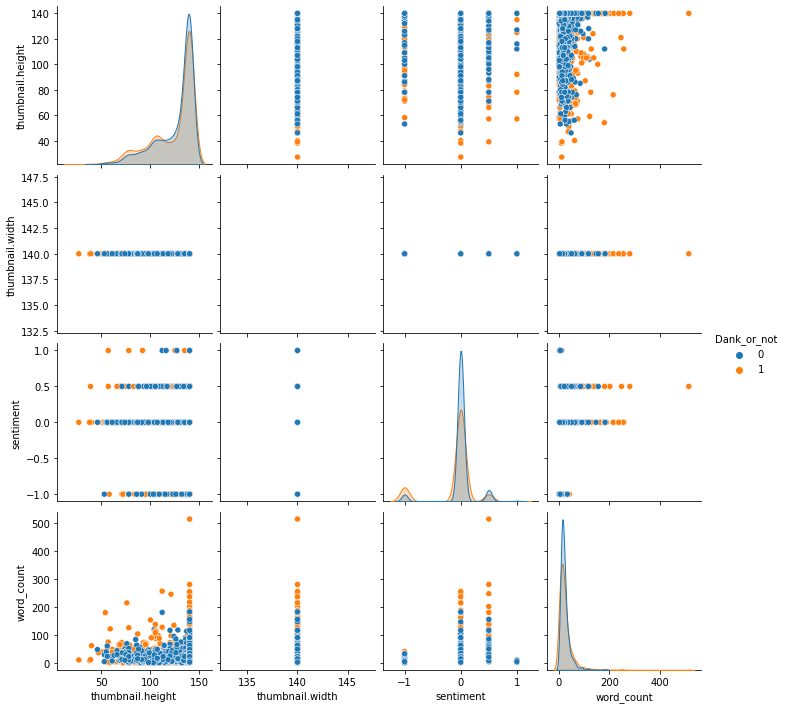

In [ ]:
sns.pairplot(data[numerical_features],hue='Dank_or_not')

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,title,author,id,ups,downs,thumbnail.height,thumbnail.width,date_created,Dank_or_not,meme_path,clean_sent,sentiment,word_count,year,month,day,hour
0,Num🅱er One,DrarenThiralas,6tehbc,87082,0,121,140,2017-08-13 10:45:09,1,memes/6tehbc.jpg,rleurope h ruvis u batteries included life is...,0.0,22,2017,8,13,10
1,Got ‘em,CasualDad8675309,8bse8k,75251,0,98,140,2018-04-12 18:21:27,1,memes/8bse8k.jpg,when reddit is making fun of mark zuckerberg f...,0.0,14,2018,4,12,18
2,50-0,NikiTosThePleb,6we7gp,64236,0,140,140,2017-08-27 19:30:27,1,memes/6we7gp.jpg,how to make millions damn wish l could read fi...,0.0,14,2017,8,27,19
3,Allow,bananahands0666,7qbcqw,63386,0,110,140,2018-01-14 11:18:09,1,memes/7qbcqw.jpg,is it norma to have a inch penis google sea...,0.0,24,2018,1,14,11
4,*mild concern*,DJ_MilkBags,7szw80,61458,0,134,140,2018-01-25 22:19:11,1,memes/7szw80.jpg,when re an npc and you see the player quicksav...,0.0,15,2018,1,25,22


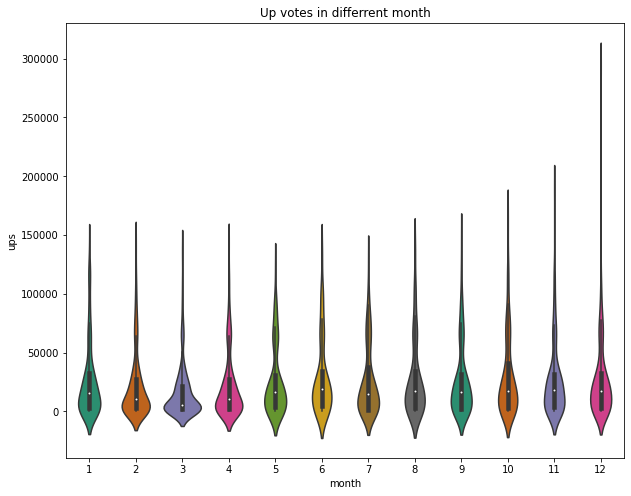

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='month',y='ups',data=data, palette="Dark2")
plt.title('Up votes in differrent month')
plt.show()

Text(0.5, 1.0, 'Upvotes vs Month')

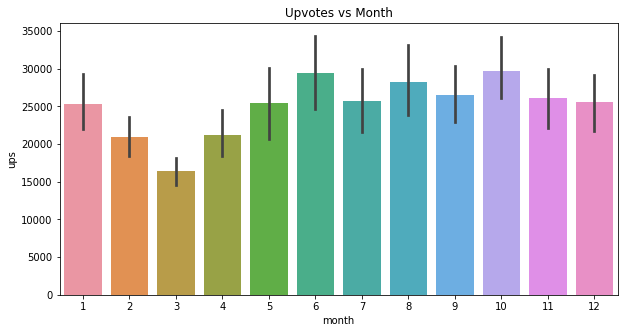

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month',y='ups',data=data)
plt.title('Upvotes vs Month')

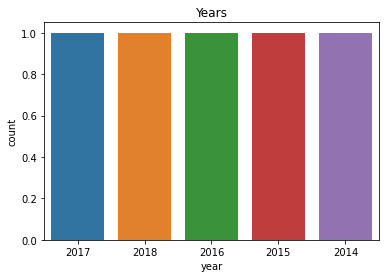

In [ ]:
sns.countplot(data['year'].value_counts())
plt.xticks([0,1,2,3,4],[2017,2018,2016,2015,2014])
plt.title("Years")
plt.show()

3rd month, which is march, is the only month with lowest vote gaining month, while all the other months performed above average in terms of gaining popularity.

Out of which June and Augus and october are the three months which have performed well in terms of gaining popularity.

Text(0.5, 1.0, 'memes distribution wrt hour')

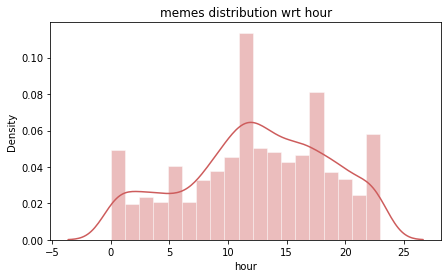

In [ ]:
f1= plt.subplots(1, figsize=(7, 4))
sns.set_style("darkgrid")
sns.distplot(data['hour'], color="indianred")
plt.title('memes distribution wrt hour')

Time a meme gets maximum appearence and thus upvotes is around after 10 am to around 23 pm

Text(0.5, 1.0, 'Hour vs Upvotes')

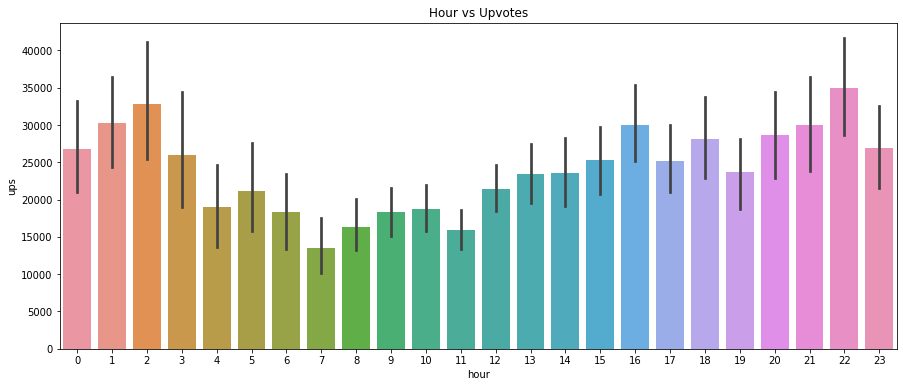

In [ ]:
f1= plt.subplots(1, figsize=(15, 6))
sns.barplot(x='hour',y='ups',data=data)
plt.title('Hour vs Upvotes')

memes with Highest upvotes


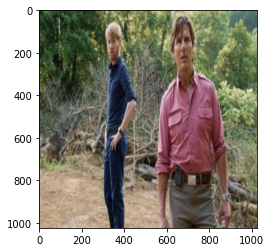

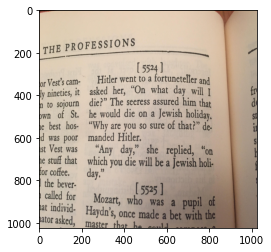

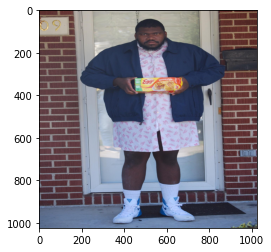

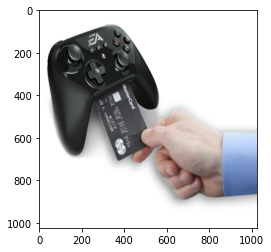

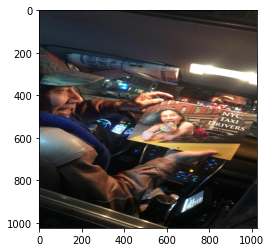

memes with Lowest upvotes


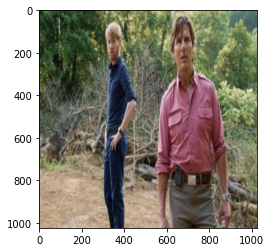

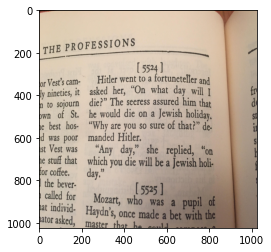

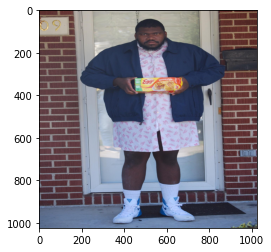

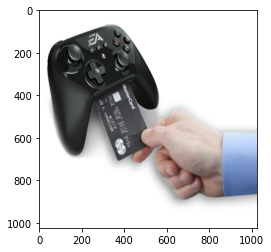

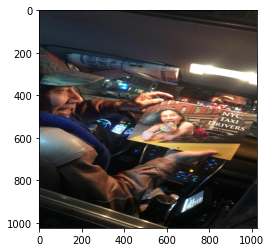

In [ ]:
# top 5 memes based on ups
# low 5 memes based on ups
top5 = data.sort_values('ups')['meme_path'][:5]
low5 = top5 = data.sort_values('ups')['meme_path'][-5:]

print("memes with Highest upvotes")
for i in top5:
    im = cv2.imread(i)
    im_resized = cv2.resize(im, (1024, 1024), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()


print("memes with Lowest upvotes")
for i in low5:
    im = cv2.imread(i)
    im_resized = cv2.resize(im, (1024, 1024), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

Based on the analysis and design below usefull features are extracted out, which includes :

*  title
*  author
*  id
*  downs
*  thumbnail.height
*  thumbnail.width
*  date_created
*  meme_path
*  clean_sent
*  sentiment
*  word_count
*  year
*  month
*  day
*  hour


Which can be now modeled up to come with the popularity predictibility.